In [ ]:
  import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode="categorical")
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Test",target_size=(224,224),batch_size=32,shuffle=False,class_mode="categorical")

Found 1789 images belonging to 3 classes.
Found 454 images belonging to 3 classes.


In [ ]:
from keras.applications.nasnet import NASNetMobile

model = Sequential()
model.add(NASNetMobile(include_top=False,weights="/content/drive/MyDrive/Models/nasnet_mobile_no_top.h5",pooling='avg',input_shape=(224,224,3)))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=SGD(lr=1e-5,momentum=0.9),metrics=['acc'])

inc_history = model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 56, epochs = 150)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/150
56/56 [==============================] - 1005s 18s/step - loss: 1.1788 - acc: 0.3605 - val_loss: 1.7016 - val_acc: 0.2335
Epoch 2/150
56/56 [==============================] - 30s 534ms/step - loss: 1.1192 - acc: 0.3935 - val_loss: 1.6484 - val_acc: 0.2379
Epoch 3/150
56/56 [==============================] - 30s 536ms/step - loss: 1.0746 - acc: 0.4326 - val_loss: 1.6035 - val_acc: 0.2423
Epoch 4/150
56/56 [==============================] - 30s 534ms/step - loss: 1.0382 - acc: 0.4617 - val_loss: 1.5657 - val_acc: 0.2401
Epoch 5/150
56/56 [==============================] - 30s 533ms/step - loss: 1.0071 - acc: 0.4885 - val_loss: 1.5338 - val_acc: 0.2401
Epoch 6/150
56/56 [==============================] - 30s 531ms/step - loss: 0.9721 - acc: 0.5143 - val_loss: 1.5058 - val_acc: 0.2489
Epoch 7/150
56/56 [==============================] - 30s 534ms/step - loss: 0.9501 - acc: 0.5344 - val_loss: 1.4834 - val_acc: 0.2577
Epoch 8/150
56/56 [==============================] - 38s 684ms

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

Confusion Matrix
[[143   2   4]
 [  1 110   2]
 [  3   3 186]]
Classification Report
                      precision    recall  f1-score   support

Downy mildew disease       0.97      0.96      0.97       149
             Healthy       0.96      0.97      0.96       113
        Rust disease       0.97      0.97      0.97       192

            accuracy                           0.97       454
           macro avg       0.97      0.97      0.97       454
        weighted avg       0.97      0.97      0.97       454



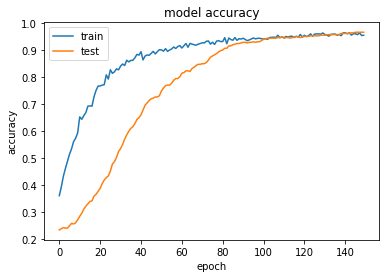

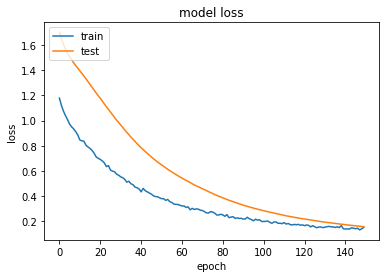

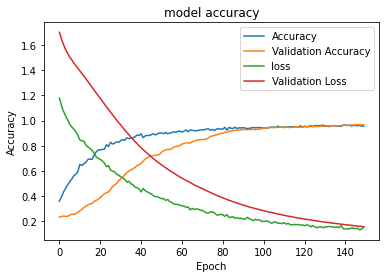

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(inc_history.history['acc'])
plt.plot(inc_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(inc_history.history['loss'])
plt.plot(inc_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(inc_history.history['acc'])
plt.plot(inc_history.history['val_acc'])
plt.plot(inc_history.history['loss'])
plt.plot(inc_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()